In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data['Family']=data['SibSp']+ data['Parch']
data.loc[(data.Family == 0),'Family']=0
data.loc[((data.Family > 0) & (data.Family < 4)) ,'Family']=1
data.loc[((data.Family >= 4)) ,'Family']=2
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
from sklearn.ensemble import RandomForestRegressor

### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(data):

    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = data[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1:])
    

    # 用得到的预测结果填补原缺失数据
    data.loc[data.Age.isnull(), 'Age'] = predictedAges 

    return data, rfr

def set_Cabin_type(data):
    data.loc[ (data.Cabin.notnull()), 'Cabin' ] = "Yes"
    data.loc[ (data.Cabin.isnull()), 'Cabin' ] = "No"
    return data

data, rfr = set_missing_ages(data)
data = set_Cabin_type(data)
data

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S,0
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,No,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C,1


In [6]:
data['Fare'] = (data['Fare']-data['Fare'].mean())/data['Fare'].std()
data.drop(['SibSp','Parch','Name','Ticket'],axis=1,inplace = True)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,1,0,3,male,22.0,-0.502163,No,S,1
1,2,1,1,female,38.0,0.786404,Yes,C,1
2,3,1,3,female,26.0,-0.488580,No,S,0
3,4,1,1,female,35.0,0.420494,Yes,S,1
4,5,0,3,male,35.0,-0.486064,No,S,0


In [7]:
dummies_Cabin = pd.get_dummies(data['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(data['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data['Pclass'], prefix= 'Pclass')

dummies_Family = pd.get_dummies(data['Family'], prefix= 'Family')


data = pd.concat([data, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass, dummies_Family], axis=1)
data.drop(['Pclass', 'Sex', 'Cabin', 'Embarked','Family'], axis=1, inplace=True)
data.head()

,PassengerId,Survived,Age,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Family_0,Family_1,Family_2
0,1,0,22.0,-0.502163,1,0,0,0,1,0,1,0,0,1,0,1,0
1,2,1,38.0,0.786404,0,1,1,0,0,1,0,1,0,0,0,1,0
2,3,1,26.0,-0.488580,1,0,0,0,1,1,0,0,0,1,1,0,0
3,4,1,35.0,0.420494,0,1,0,0,1,1,0,1,0,0,0,1,0
4,5,0,35.0,-0.486064,1,0,0,0,1,0,1,0,0,1,1,0,0


In [8]:
y = data['Survived'].copy().as_matrix()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [9]:
X = data.drop('Survived',axis=1).as_matrix()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

In [14]:
y_test.type

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [15]:
data.to_csv("predicted_result.csv", index=False)

Sigmoid Function

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

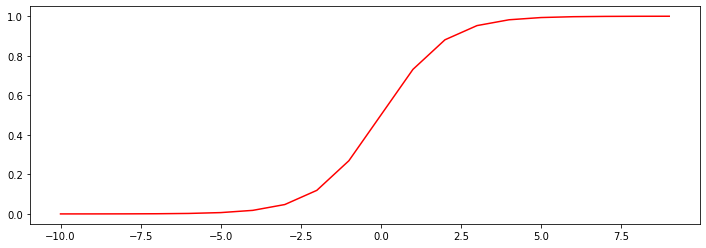

In [4]:
nums = np.arange(-10, 10, step=1) #creates a vector containing 20 equally spaced values from -10 to 10
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(nums, sigmoid(nums), 'r')

In [108]:
def loss_funtion(dataMat, classLabels, weights):
    m, n = dataMat.shape
    loss = 0.0
    for i in range(m):
        sum_theta_x = 0.0
        for j in range(n):
            sum_theta_x += dataMat[i, j] * weights.T[0, j]
        propability = sigmoid(sum_theta_x)
        loss += -classLabels[i, 0] * np.log(propability) - (1 - classLabels[i, 0]) * np.log(1 - propability)
    return loss


In [89]:
def grad_descent(dataMatIn, classLabels):
    dataMatrix = np.array(dataMatIn)  #(m,n)
    labelMat = np.array(classLabels).T
    m, n = np.shape(dataMatrix) 
 #   dataMatrix1 = np.squeeze(dataMatrix)
    weights = np.ones((m, 1))   #创建任意维度和元素个数的数组，其元素值均为1；
    #weights = np.zeros(shape=(len(dataMatrix1),1))
    alpha = 0.01
    maxstep = 900
    eps = 0.0001
    count = 0
    loss_array = []

    for i in range(maxstep):
        loss = loss_funtion(dataMatrix, labelMat, weights)

        h_theta_x = sigmoid(dataMatrix * weights)
        e = h_theta_x - labelMat
        new_weights = weights - alpha * dataMatrix.T * e
        new_loss = loss_funtion(dataMatrix, labelMat, new_weights)
        loss_array.append(new_loss)
        if abs(new_loss - loss) < eps:
            break
        else:
            weights = new_weights
            count += 1

    print("count is: ", count) 
    print("loss is: ", loss) 
    print ("weights is: ", weights)

    return weights, loss_array


In [7]:
def plotloss(loss_array):
    n = len(loss_array)
    plt.xlabel("iteration num")
    plt.ylabel("loss")
    plt.scatter(range(1, n+1), loss_array)
    plt.show()


In [62]:
def parse_data():
    data = pd.read_csv('predicted_result.csv')
    data = np.array(data.values)
    dataMat = data[:, 0:-1]
    classLabels = data[:, 1]
#    dataMat = np.insert(dataMat, 0, 1, axis=1)
    return dataMat, classLabels


In [106]:
dataMat = data[:, 0:-1]
dataMatrix = np.mat(data)
m,n = dataMatrix.shape

In [109]:
data, labels = parse_data()
r, loss_array = grad_descent(data, labels)
r = np.mat(r).transpose()
plotloss(loss_array)

IndexError: too many indices for array